---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
P1_Graphs

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [5]:
graph1_deg = P1_Graphs[0].degree().values()
graph1_dict = {}
for deg in graph1_deg:
    if deg not in graph1_dict:
        graph1_dict[deg] = 1
    else:
        graph1_dict[deg] += 1
x_vals = sorted(list(graph1_dict.keys()))
y_vals = [graph1_dict[x] for x in x_vals]

<IPython.core.display.Javascript object>


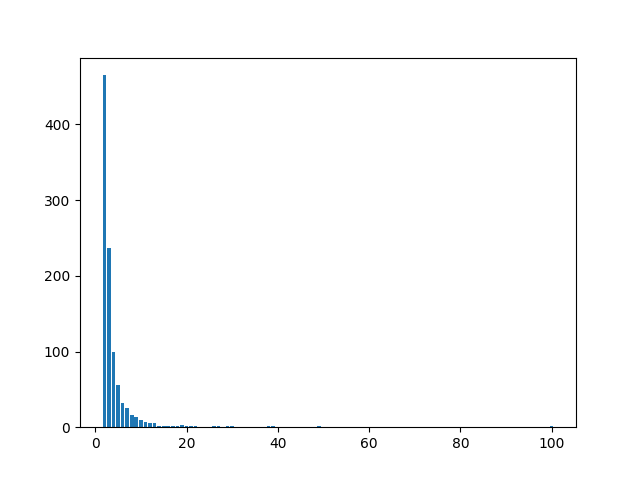

<Container object of 29 artists>

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.bar(x_vals, y_vals)

In [8]:
graph2_deg = P1_Graphs[1].degree().values()
graph2_dict = {}
for deg in graph2_deg:
    if deg not in graph2_dict:
        graph2_dict[deg] = 1
    else:
        graph2_dict[deg] += 1
x_vals = sorted(list(graph2_dict.keys()))
y_vals = [graph1_dict[x] for x in x_vals]
print(graph2_dict)

{10: 615, 11: 171, 9: 166, 8: 23, 12: 22, 7: 2, 13: 1}


In [17]:
nx.average_clustering(P1_Graphs[1])

0.5642419635919628

<IPython.core.display.Javascript object>


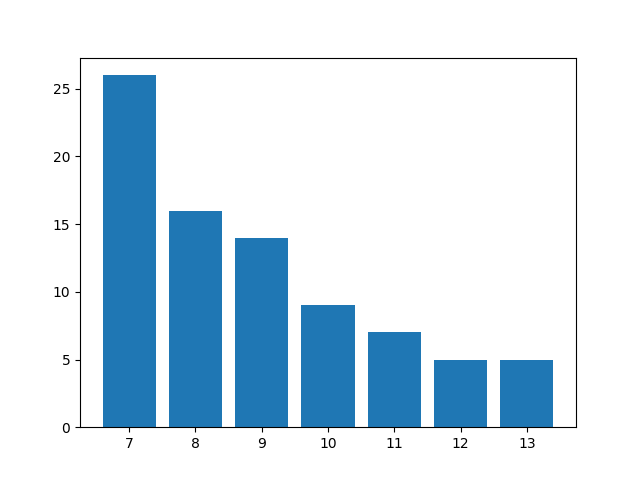

<Container object of 7 artists>

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.bar(x_vals, y_vals)

In [10]:
graph3_deg = P1_Graphs[2].degree().values()
graph3_dict = {}
for deg in graph3_deg:
    if deg not in graph3_dict:
        graph3_dict[deg] = 1
    else:
        graph3_dict[deg] += 1
x_vals = sorted(list(graph3_dict.keys()))
y_vals = [graph3_dict[x] for x in x_vals]
print(graph3_dict)

{3: 93, 4: 567, 2: 2, 5: 79, 6: 9}


<IPython.core.display.Javascript object>


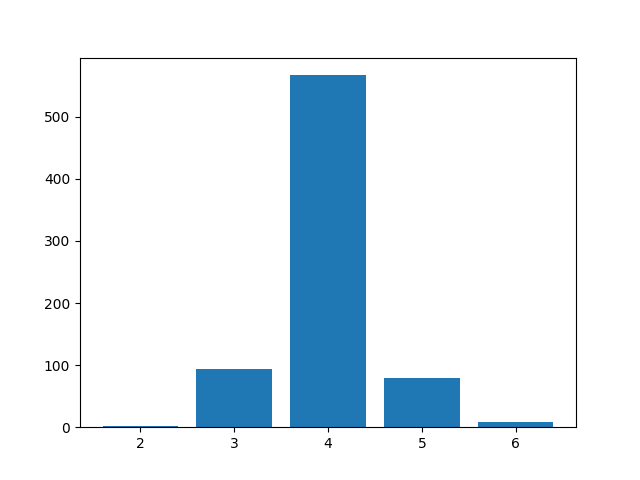

<Container object of 5 artists>

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.bar(x_vals, y_vals)

In [12]:
graph4_deg = P1_Graphs[3].degree().values()
graph4_dict = {}
for deg in graph4_deg:
    if deg not in graph4_dict:
        graph4_dict[deg] = 1
    else:
        graph4_dict[deg] += 1
x_vals = sorted(list(graph4_dict.keys()))
y_vals = [graph4_dict[x] for x in x_vals]
print(graph4_dict)

{27: 6, 47: 2, 22: 6, 62: 1, 42: 2, 46: 3, 92: 1, 51: 1, 53: 1, 55: 1, 31: 2, 23: 1, 17: 9, 24: 2, 44: 2, 32: 2, 16: 5, 18: 4, 29: 3, 30: 1, 15: 7, 21: 4, 12: 15, 9: 25, 8: 47, 36: 1, 10: 19, 20: 1, 13: 14, 7: 58, 14: 8, 5: 133, 11: 13, 19: 1, 4: 259, 6: 89, 25: 1}


<IPython.core.display.Javascript object>


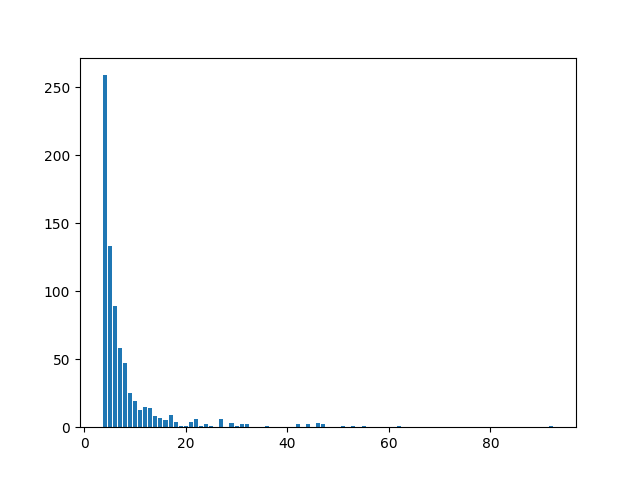

<Container object of 37 artists>

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.bar(x_vals, y_vals)

In [14]:
graph5_deg = P1_Graphs[4].degree().values()
graph5_dict = {}
for deg in graph5_deg:
    if deg not in graph5_dict:
        graph5_dict[deg] = 1
    else:
        graph5_dict[deg] += 1
x_vals = sorted(list(graph5_dict.keys()))
y_vals = [graph5_dict[x] for x in x_vals]
print(graph5_dict)

{4: 218, 5: 126, 6: 74, 2: 102, 3: 195, 8: 12, 7: 20, 9: 2, 11: 1}


<IPython.core.display.Javascript object>


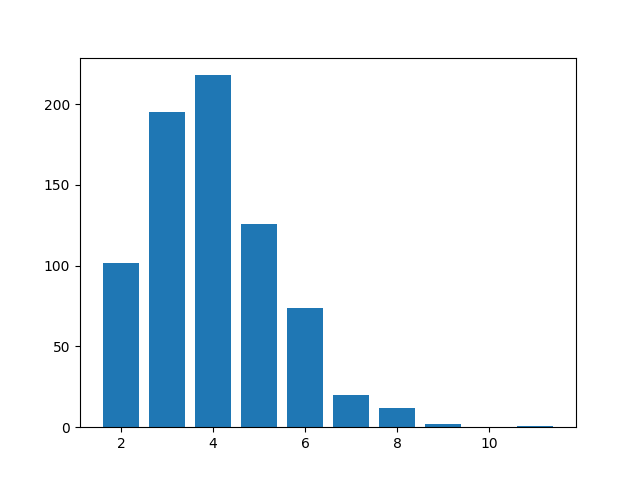

<Container object of 9 artists>

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.bar(x_vals, y_vals)

In [16]:
def graph_identification():
    
    # Your Code Here
    ans1 = 'PA'
    ans2 = 'SW_L'
    ans3 = 'SW_L'
    ans4 = 'PA'
    ans5 = 'SW_H'
    
    return [ans1, ans2, ans3, ans4, ans5]# Your Answer Here

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [18]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [22]:
df = pd.DataFrame(index = G.nodes())
df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))

array([ 1, 21, 25, 14,  9, 26,  4, 17, 34, 11,  5, 10, 36, 37,  7, 22,  8,
       15,  3, 29, 20, 16, 38, 27, 13,  6,  0, 28,  2, 40, 35, 23, 19, 24,
       32, 31, 39, 12, 30, 41, 18, 33])

In [32]:
df['degree'] = G.degree().values()
degree_dict = {}
for dept in list(df['Department'].unique()):
    df_focus = df[df['Department'] == dept]
    sum_degree = df_focus['degree'].sum()
    degree_dict[dept] = sum_degree

In [33]:
df['degree_proportion'] = df.apply(lambda x: x['degree']/degree_dict[x['Department']], axis = 1)

In [38]:
df['closeness'] = nx.closeness_centrality(G).values()
closeness_dict = {}
for dept in list(df['Department'].unique()):
    df_focus = df[df['Department'] == dept]
    sum_degree = df_focus['closeness'].sum()
    closeness_dict[dept] = sum_degree
df['closeness_proportion'] = df.apply(lambda x: x['closeness']/closeness_dict[x['Department']], axis = 1)
df.head()

,Department,ManagementSalary,degree,degree_proportion,closeness,closeness_proportion
0,1,0.0,44,0.025761,0.421991,0.018267
1,1,NaN,52,0.030445,0.422360,0.018283
2,21,NaN,95,0.056246,0.461490,0.022107
3,21,1.0,71,0.042037,0.441663,0.021157
4,21,1.0,96,0.056838,0.462152,0.022138


In [41]:
df_used = df[df['ManagementSalary'].isnull()]
df_used.head()

,Department,ManagementSalary,degree,degree_proportion,closeness,closeness_proportion
1,1,NaN,52,0.030445,0.422360,0.018283
2,21,NaN,95,0.056246,0.461490,0.022107
5,25,NaN,171,0.327586,0.501484,0.187156
8,14,NaN,37,0.012776,0.413151,0.011980
14,4,NaN,80,0.022760,0.442068,0.010601


In [49]:
df['betweenness'] = nx.betweenness_centrality(G).values()
betweenness_dict = {}
for dept in list(df['Department'].unique()):
    df_focus = df[df['Department'] == dept]
    sum_degree = df_focus['betweenness'].sum()
    betweenness_dict[dept] = sum_degree
df['betweenness_proportion'] = df.apply(lambda x: x['betweenness']/betweenness_dict[x['Department']], axis = 1)
df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


,Department,ManagementSalary,degree,degree_proportion,closeness,closeness_proportion,betweenness,betweenness_proportion
0,1,0.0,44,0.025761,0.421991,0.018267,0.001124,0.018682
1,1,NaN,52,0.030445,0.422360,0.018283,0.001195,0.019868
2,21,NaN,95,0.056246,0.461490,0.022107,0.006570,0.117223
3,21,1.0,71,0.042037,0.441663,0.021157,0.001654,0.029505
4,21,1.0,96,0.056838,0.462152,0.022138,0.005547,0.098983


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
def salary_predictions():
    
    # Your Code Here
    # Encode basic info
    df = pd.DataFrame(index = G.nodes())
    df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
    df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G, 'ManagementSalary'))
    
    # Encode two new features: degree, degree_proportion
    df['degree'] = G.degree().values()
    degree_dict = {}
    for dept in list(df['Department'].unique()):
        df_focus = df[df['Department'] == dept]
        sum_degree = df_focus['degree'].sum()
        degree_dict[dept] = sum_degree
    df['degree_proportion'] = df.apply(lambda x: x['degree']/degree_dict[x['Department']], axis = 1)
    
    # Encode new feature: closeness
    df['closeness'] = nx.closeness_centrality(G).values()
    
    # Encode new feature: betweenness
    df['betweenness'] = nx.betweenness_centrality(G).values()
    
    # Select the dataframe to work on
    df_used = df[df['ManagementSalary'].notnull()]
    y = df_used['ManagementSalary']
    X = df_used.drop(['ManagementSalary', 'Department'], axis = 1)
    df_test = df[df['ManagementSalary'].isnull()]
    
    # Select training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Run Gradient Boosting Classifier Model and predict the associated probability
    clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
    #clf = LogisticRegression().fit(X_train, y_train)
    prediction = clf.predict_proba(X_test)[:, 1]
    print(roc_auc_score(y_test, prediction))
    
    # Generate predictions on test set
    X_assignment = df_test.drop(['ManagementSalary', 'Department'], axis = 1)
    prediction_test = clf.predict_proba(X_assignment)[:, 1]
    
    return pd.Series(data = prediction_test, index = X_assignment.index) # Your Answer Here

output = salary_predictions()
output.to_csv('Salary_prediction.csv')

0.906167979003


### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [57]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


In [99]:
future_connections.shape

(488446, 3)

In [91]:
jaccard_coeff = nx.jaccard_coefficient(G)
jaccard_dict = {}
for u,v,p in jaccard_coeff:
    jaccard_dict[(u,v)] = p
    jaccard_dict[(v,u)] = p
future_connections['jaccard_coeff'] = future_connections.apply(lambda x: jaccard_dict[x.name], axis = 1)
future_connections.head()

,Future Connection,jaccard_coeff
"(6, 840)",0.0,0.073770
"(4, 197)",0.0,0.015504
"(620, 979)",0.0,0.000000
"(519, 872)",0.0,0.060606
"(382, 423)",0.0,0.000000


In [97]:
CRA_coeff = nx.cn_soundarajan_hopcroft(G, community = 'Department')
CRA_dict = {}
for u,v,p in CRA_coeff:
    CRA_dict[(u,v)] = p
    CRA_dict[(v,u)] = p
future_connections['CRA_coeff'] = future_connections.apply(lambda x: CRA_dict[x.name], axis = 1)

Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [101]:
def new_connections_predictions():
    
    # Your Code Here
    # Feature 1: Jaccard coefficient
    jaccard_coeff = nx.jaccard_coefficient(G)
    jaccard_dict = {}
    for u,v,p in jaccard_coeff:
        jaccard_dict[(u,v)] = p
        jaccard_dict[(v,u)] = p
    future_connections['jaccard_coeff'] = future_connections.apply(lambda x: jaccard_dict[x.name], axis = 1)
    
    # Feature 2: Adamic Adar coefficient
    adamic_adar = nx.adamic_adar_index(G)
    adamic_adar_dict = {}
    for u,v,p in adamic_adar:
        adamic_adar_dict[(u,v)] = p
        adamic_adar_dict[(v,u)] = p
    future_connections['adam_coeff'] = future_connections.apply(lambda x: adamic_adar_dict[x.name], axis = 1)
    
    # Feature 3: Preferential attachment coefficient
    prefer_coeff = nx.preferential_attachment(G)
    prefer_dict = {}
    for u,v,p in prefer_coeff:
        prefer_dict[(u,v)] = p
        prefer_dict[(v,u)] = p
    future_connections['prefer_coeff'] = future_connections.apply(lambda x: prefer_dict[x.name], axis = 1)
    
    # Feature 4: Community Common Neighbors 
    CCN_coeff = nx.cn_soundarajan_hopcroft(G, community = 'Department')
    CCN_dict = {}
    for u,v,p in CCN_coeff:
        CCN_dict[(u,v)] = p
        CCN_dict[(v,u)] = p
    future_connections['CCN_coeff'] = future_connections.apply(lambda x: CCN_dict[x.name], axis = 1)
    
    # Select the dataframe to work on
    df_used = future_connections[future_connections['Future Connection'].notnull()]
    y = df_used['Future Connection']
    X = df_used.drop(['Future Connection'], axis = 1)
    df_test = future_connections[future_connections['Future Connection'].isnull()]
    
    # Select training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Run Gradient Boosting Classifier Model and predict the associated probability
    clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
    prediction = clf.predict_proba(X_test)[:, 1]
    print(roc_auc_score(y_test, prediction))
    
    # Generate predictions on test set
    X_assignment = df_test.drop(['Future Connection'], axis = 1)    
    prediction_test = clf.predict_proba(X_assignment)[:, 1]
    
    return pd.Series(data = prediction_test, index = X_assignment.index) # Your Answer Here    
    
output = new_connections_predictions()
output.to_csv('New_Connections_prediction.csv')

0.912247705045
